In [1]:
library(twitteR)
library(sqldf)
library(ggmap)
require(ggplot2)
library("maptools")
library(maps)
setup_twitter_oauth("","","","")#Enter your OAuth creds here

Loading required package: gsubfn
Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite
Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


[1] "Using direct authentication"


In [2]:
#This is the code for searching and plotting points
#Either the this part can be run to search and then plot or the next part can be run to get data from database and plot
##Code Searching Begins#
usinput = "#ronaldo" #Enter the word to search for here
coordinates<-searchTwitter(searchString=usinput,n=500)

In [3]:
tweetFrame <- twListToDF(coordinates)
userInfo <- lookupUsers(tweetFrame$screenName)
userFrame <- twListToDF(userInfo)

In [4]:
locations <- geocode(location = userFrame$location, source = "dsk")

Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Armstrong%20BC%20&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Bangladesh&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Sand%20am%20Main&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Sand am Main"”Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Metro%20Atlanta&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=S%C3%A3o%20Paulo,%20Brazil&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Matamoros,%20Coahuila%20Torreon%20Me&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Lehigh%20Valley,%20PA&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/g

In [5]:
lcog <- round(locations, digits = 3)
##Code Searching Ends#
#Either the above code can be run to search and then plot or the below part can be run to get data from database and plot

In [8]:
#In this part, the locations are retrieved from the database file for #falcons
#Code Retreiving from Database starts
db <- dbConnect(SQLite(), dbname="stusers1.sqlite")
data1 <- dbReadTable(conn = db, "School1")
data2 <- dbReadTable(conn = db, "School2")
data3 <- dbReadTable(conn = db, "School3")

In [9]:
dataf = c()
dataf <- rbind(dataf,data1)
dataf <- rbind(dataf,data2)
dataf <- rbind(dataf,data3)

In [10]:
lcog <- round(dataf, digits = 3)
#Code Retreiving from Database starts
#Code from the next cell is common for both searching and retreiving 

In [11]:
per <- paste(lcog$lon,lcog$lat, sep = ",")
lec <- table(per)
aa = c()
aa <- c(names(lec))
bb = c()
cc = c()
dd = c()
for(ki in 1:length(lec))
{
    bb <- c(bb,lec[[ki]])
    cc <- c(cc,strsplit(per, ",")[[ki]][1])
    dd <- c(dd,strsplit(per, ",")[[ki]][2])
}
locd.data <- data.frame(aa,bb, cc, dd,stringsAsFactors=FALSE)

Warning message in xy.coords(x, y):
“NAs introduced by coercion”Warning message in xy.coords(x, y):
“NAs introduced by coercion”

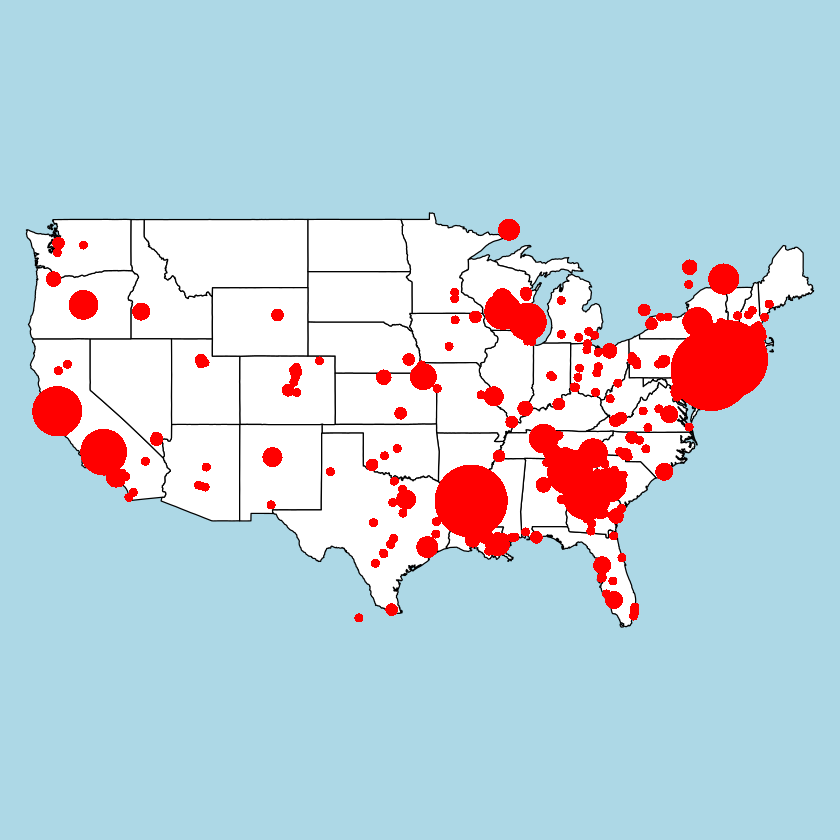

In [12]:
map("state", fill=TRUE, col="white", bg="lightblue", mar=c(0,0,0,0))
points(locd.data$cc,locd.data$dd, col="red", pch=16, cex = sqrt(locd.data$bb))
#Plotted according to cities